In [1]:
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

In [2]:
d = 2
n = 50
h = int(n/2)

x= -2 * np.random.rand(n,d)
xt = 1 + 2 * np.random.rand(h,d)

x[h:n, :] = xt

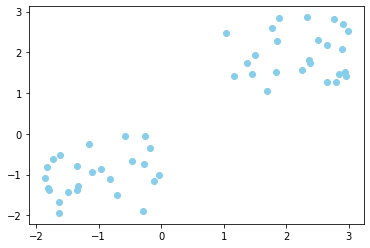

In [3]:
plt.scatter(x[:,0], x[:, 1], c = 'skyblue')
plt.show()

In [4]:
class Kmeans:
    
    def init(self):
        r = np.random.rand(self.k, self.dim)
        c = np.zeros((self.k, self.dim))
        
        for i in range(self.dim):
            m = x[:,i].min()
            l = (x[:,i].max() - m)
            c[:,i] = m + (r[:,i] * l)
            
        return c
    
    def cluster(self):
        cl = []
        for j in range(self.k):
            cl.append([])
        return cl
    
    def distance(self, x1, x2):
        s = 0
        for i in range(self.dim):
            s += np.power(x1[i]-x2[i], 2)
            
        return np.sqrt(s)
    
    def means(self):
        for i in range(len(self.clt)):
            tmp = np.asarray(self.clt[i])
            
            if(tmp.shape[0] > 0):            
                for j in range(self.dim):
                    self.cent[i,j] = tmp[:,j].mean()
            else:
                self.cent[i] = np.zeros(self.dim)
    
    def fit(self, x, k, epochs):
        self.dim = x.shape[1]
        self.k = k
        
        self.cent = self.init()
        cd = np.zeros(self.k)
        
        for i in range(epochs):
            self.clt = self.cluster()
            for xp in x:
                for t in range(len(self.cent)):
                    cd[t] = self.distance(xp, self.cent[t])
                cm = np.argmin(cd)
                
                self.clt[cm].append(xp)
                
            self.means()
            
        return (self.cent, self.clt)

In [5]:
k = 2
epochs = 10

km = Kmeans()
res = km.fit(x, k, epochs)

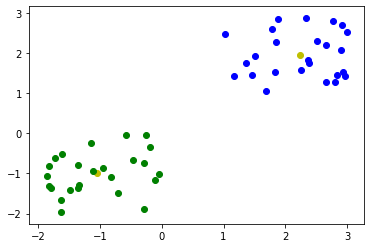

In [6]:
plt.scatter(res[0][:,0], res[0][:,1], c='y')
cycol = cycle('bgrcmk')

for cl in res[1]:
    tmp = np.asarray(cl)
    if(tmp.shape[0] > 0):
        plt.scatter(tmp[:,0], tmp[:,1], c=next(cycol))

plt.show()